In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Groceries_dataset.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   itemDescription  38765 non-null  object
dtypes: int64(1), object(1)
memory usage: 605.8+ KB


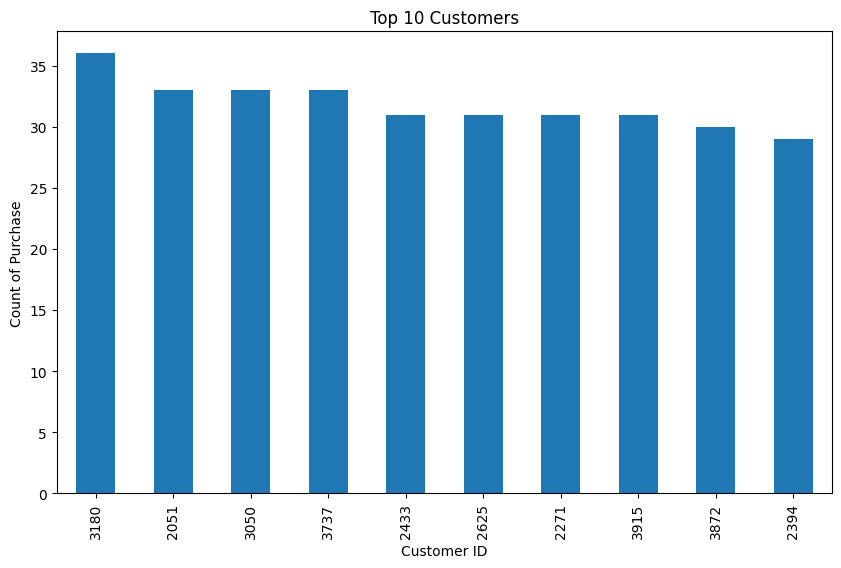

In [4]:
plt.figure(figsize=(10,6))
df['Member_number'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Count of Purchase')
plt.show()

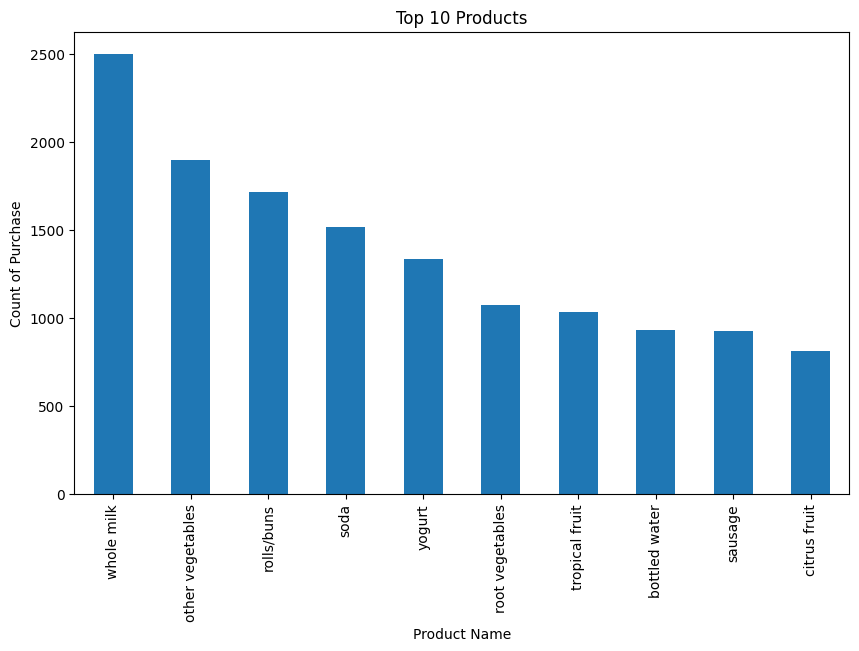

In [5]:
plt.figure(figsize=(10,6))
df['itemDescription'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Products')
plt.xlabel('Product Name')
plt.ylabel('Count of Purchase')
plt.show()

In [6]:
#pip install mlxtend

In [7]:
basket=df.groupby('Member_number')['itemDescription'].apply(list).values.tolist()

In [8]:
#basket

In [9]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit_transform(basket)

In [10]:
te_ary

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]], shape=(3898, 167))

In [11]:
df_encoded=pd.DataFrame(te_ary,columns=te.columns_)

In [12]:
df_encoded

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [13]:
df['Member_number'].nunique()

3898

In [14]:
df['itemDescription'].nunique()

167

In [15]:
df_encoded.shape

(3898, 167)

In [16]:
from mlxtend.frequent_patterns import apriori

In [17]:
freq_items=apriori(df_encoded,min_support=0.02,use_colnames=True,max_len=2)

In [18]:
from mlxtend.frequent_patterns import association_rules

In [19]:
lift_df=association_rules(freq_items,metric='lift',min_threshold=1.1)

In [20]:
lift_df=lift_df[['antecedents', 'consequents','support','confidence', 'lift']]

In [21]:
lift_df.sort_values('lift',ascending=False)

,antecedents,consequents,support,confidence,lift
731,(white bread),(whipped/sour cream),0.021550,0.242775,1.569379
730,(whipped/sour cream),(white bread),0.021550,0.139303,1.569379
682,(sausage),(sugar),0.020523,0.099626,1.511065
683,(sugar),(sausage),0.020523,0.311284,1.511065
385,(margarine),(frankfurter),0.023858,0.203947,1.483184
...,...,...,...,...,...
350,(dessert),(other vegetables),0.035916,0.415430,1.103098
723,(white bread),(tropical fruit),0.022832,0.257225,1.100620
722,(tropical fruit),(white bread),0.022832,0.097695,1.100620
634,(soda),(pork),0.045664,0.145663,1.100376
